# Resultados Trabalho 2

Dataset utilizado: https://www.kaggle.com/datasets/bhavikjikadara/student-study-performance




## Importando as bibliotecas principais

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

### Lendo o dataset

In [2]:
# Carregar os dados
dados = pd.read_csv('study_performance.csv')

# Visualizar as primeiras linhas do dataframe
dados.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Análise de Regressão

                            OLS Regression Results                            
Dep. Variable:             math_score   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1031.
Date:                Sat, 29 Jun 2024   Prob (F-statistic):          2.25e-243
Time:                        21:04:19   Log-Likelihood:                -3576.9
No. Observations:                1000   AIC:                             7160.
Df Residuals:                     997   BIC:                             7175.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.5241      1.328      5.665

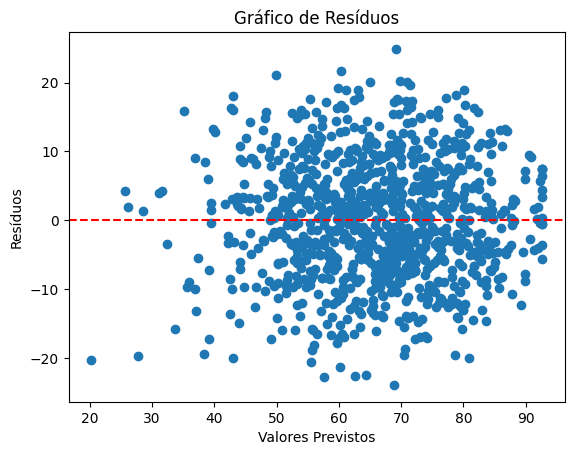

In [3]:
# Definir a variável dependente e independente
X = dados[['reading_score', 'writing_score']]  # variáveis independentes
y = dados['math_score']  # variável dependente

# Adicionar uma constante ao modelo (intercepto)
X = sm.add_constant(X)

# Passo 3: Criar o modelo de regressão linear
modelo = sm.OLS(y, X).fit()

# Passo 4: Imprimir o resumo do modelo
print(modelo.summary())

# Passo 5: Plotar os resíduos para verificar a homogeneidade da variância
plt.scatter(modelo.predict(), modelo.resid)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')
plt.show()

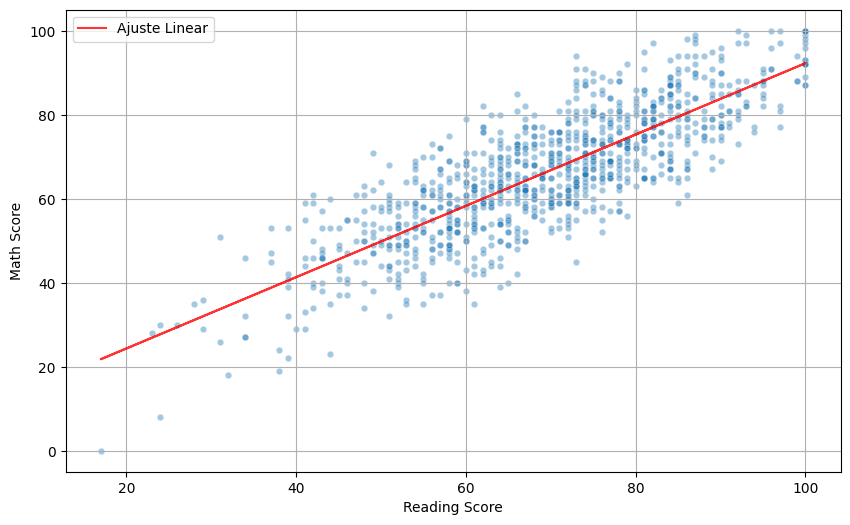

Mean Squared Error (MSE) - Linear: 76.1565134634969
R-squared (R²) - Linear: 0.668436506450109


In [4]:
#### ALTERACOES QUE FAREI NAO OFICIAL
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dados
X = dados[['reading_score']].values
y = dados['math_score'].values

# Modelo de regressão linear
modelo_linear = LinearRegression()
modelo_linear.fit(X, y)

# Previsões
y_pred_linear = modelo_linear.predict(X)

# Plotagem
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados, x='reading_score', y='math_score', alpha=0.4, s=22)
plt.plot(dados['reading_score'], y_pred_linear, color='red', alpha=0.8, label='Ajuste Linear')

plt.xlabel('Reading Score')
plt.ylabel('Math Score')
plt.legend()
plt.grid(True)
plt.show()

mse_linear = mean_squared_error(y, y_pred_linear)
r2_linear = r2_score(y, y_pred_linear)

print(f'Mean Squared Error (MSE) - Linear: {mse_linear}')
print(f'R-squared (R²) - Linear: {r2_linear}')


In [5]:
from statsmodels.formula.api import ols

# Preparar os dados (certifique-se que seu dataset está corretamente nomeado nas colunas)
# Exemplo: renomear colunas para remover espaços e caracteres especiais se necessário
dados.columns = [col.replace(" ", "_").replace("'", "") for col in dados.columns]

# Executar ANOVA para 'gender'
modelo_gender = ols('math_score ~ C(gender)', data=dados).fit()
anova_gender = sm.stats.anova_lm(modelo_gender, typ=2)
print("ANOVA para Gênero:")
print(anova_gender)
print("\n")

# Executar ANOVA para 'race_ethnicity'
modelo_race = ols('math_score ~ C(race_ethnicity)', data=dados).fit()
anova_race = sm.stats.anova_lm(modelo_race, typ=2)
print("ANOVA para Grupo Étnico:")
print(anova_race)
print("\n")

# Executar ANOVA para 'parental_level_of_education'
modelo_education = ols('math_score ~ C(parental_level_of_education)', data=dados).fit()
anova_education = sm.stats.anova_lm(modelo_education, typ=2)
print("ANOVA para Nível de Educação dos Pais:")
print(anova_education)
print("\n")

ANOVA para Gênero:
                  sum_sq     df          F        PR(>F)
C(gender)    6481.373854    1.0  28.979336  9.120186e-08
Residual   223207.705146  998.0        NaN           NaN


ANOVA para Grupo Étnico:
                          sum_sq     df          F        PR(>F)
C(race_ethnicity)   12728.816698    4.0  14.593885  1.373219e-11
Residual           216960.262302  995.0        NaN           NaN


ANOVA para Nível de Educação dos Pais:
                                       sum_sq     df         F    PR(>F)
C(parental_level_of_education)    7295.561831    5.0  6.521583  0.000006
Residual                        222393.517169  994.0       NaN       NaN




In [6]:
from scipy.stats import chi2_contingency

# Agrupar as pontuações de matemática em categorias (por exemplo)
dados['math_score_cat'] = pd.cut(dados['math_score'], bins=[0, 60, 80, 100], labels=['Baixo', 'Médio', 'Alto'])

# Criar uma tabela de contingência entre 'test_preparation_course' e 'math_score_cat'
tab_conting = pd.crosstab(dados['test_preparation_course'], dados['math_score_cat'])

# Executar o teste qui-quadrado
chi2, p_value, dof, expected = chi2_contingency(tab_conting)

# Imprimir os resultados
print("Teste Qui-Quadrado")
print("Chi2 Statistic:", chi2)
print("P-valor:", p_value)
print("Graus de Liberdade:", dof)
print("Tabela de Frequências Esperadas:")
print(expected)

Teste Qui-Quadrado
Chi2 Statistic: 21.465940454139826
P-valor: 2.1813746204046104e-05
Graus de Liberdade: 2
Tabela de Frequências Esperadas:
[[121.12512513 173.8038038   63.07107107]
 [216.87487487 311.1961962  112.92892893]]
